In [1]:
#importing packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
#importing the datase

df=pd.read_csv(r'MumbaiDataset.csv',delimiter='|')
df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [4]:
df.shape


(15081, 12)

In [5]:
#Initial memory usage
df.info

<bound method DataFrame.info of                     NAME PRICE  \
0                Hitchki  1200   
1           Baba Falooda   400   
2          Chin Chin Chu  1800   
3         Butterfly High  1000   
4              BKC  DIVE  1200   
...                  ...   ...   
15076  Hari Om Snack Bar   350   
15077           PitaBurg   400   
15078     Uncha Otlawala   300   
15079     Mandarin Panda   400   
15080                     NaN   

                                         CUSINE_CATEGORY    CITY  \
0      Modern Indian,North Indian,Chinese,Momos,Birya...  Mumbai   
1                           Desserts,Ice Cream,Beverages  Mumbai   
2                                          Asian,Chinese  Mumbai   
3                                          Modern Indian  Mumbai   
4                       North Indian,Chinese,Continental  Mumbai   
...                                                  ...     ...   
15076                     Fast Food,South Indian,Chinese  Mumbai   
15077          

In [6]:
df.drop(columns=['CITY','URL','PAGE NO','TIMING','VOTES'],inplace=True)

In [7]:
df.head

<bound method NDFrame.head of                     NAME PRICE  \
0                Hitchki  1200   
1           Baba Falooda   400   
2          Chin Chin Chu  1800   
3         Butterfly High  1000   
4              BKC  DIVE  1200   
...                  ...   ...   
15076  Hari Om Snack Bar   350   
15077           PitaBurg   400   
15078     Uncha Otlawala   300   
15079     Mandarin Panda   400   
15080                     NaN   

                                         CUSINE_CATEGORY  \
0      Modern Indian,North Indian,Chinese,Momos,Birya...   
1                           Desserts,Ice Cream,Beverages   
2                                          Asian,Chinese   
3                                          Modern Indian   
4                       North Indian,Chinese,Continental   
...                                                  ...   
15076                     Fast Food,South Indian,Chinese   
15077                                 Fast Food,Lebanese   
15078                

In [8]:
# Duplicates values
df.duplicated().sum()

1256

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.dropna(0,'any',inplace=True)

C:\Users\rugve\AppData\Local\Temp\ipykernel_11008\1644345486.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



In [11]:
df.head(5)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING_TYPE,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Veľmi dobré,4.4


In [12]:
#Checking if null values
df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
RATING_TYPE        0
RATING             0
dtype: int64

In [13]:
#Rename columns
df.rename({'CUSINE_CATEGORY' : 'CUISINE_CATEGORY', 'CUSINE TYPE' : 'OUTLET_TYPE', 'RATING_TYPE': 'REVIEWS'},axis=1, inplace=True)

df.head()

,NAME,PRICE,CUISINE_CATEGORY,REGION,OUTLET_TYPE,REVIEWS,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Veľmi dobré,4.4


In [14]:
df['RATING'].unique()

array(['4.9', '4.4', '4.2', '4.3', '4.5', '4.7', '4.0', '4.6', '4.1',
       'RATING', '3.9', '3.8', '-', '3.6', 'NEW', '3.4', '3.0', '3.7',
       '4.8', '3.3', '3.5', '3.2', '3.1', '2.7', '2.5', '2.8', '2.6',
       '2.3', '2.9', '2.4', 'Opening', '2.1', '2.2', '1.8', '2.0'],
      dtype=object)

In [15]:
#Cleaning Rating column
df['RATING'] = df.apply(lambda x: 0 if x['RATING'] in ['-','NEW','Opening','RATING'] else x['RATING'], axis=1)


In [16]:
#Cleaning PRICE Column - 1
df['PRICE'].replace(to_replace='PRICE' , value='0', inplace=True)

In [17]:
#Cleaning PRICE column
df['PRICE'].unique()
#already cleaned

array(['1200', '400', '1800', '1000', '800', '1300', '1500', '600',
       '1400', '1100', '0', '2000', '350', '900', '700', '500', '1600',
       '150', '300', '550', '450', '650', '750', '250', '200', '850',
       '100', '2500', '1450', '180', '950', '1700', '1900', '2600',
       '2400', '3000', '1250', '3200', '505', '2200', '1050', '1650',
       '1350', '50', '920', '1150', '1550', '3500', '398', '5000', '120',
       '220', '160', '340', '5', '480', '2100', '580', '1850', '249',
       '80', '2300', '360', '3502', '248', '2700'], dtype=object)

In [18]:
df['REVIEWS'].unique()

array(['Excellent', 'Very Good', 'Veľmi dobré', 'RATING_TYPE', 'Good',
       'Velmi dobré', 'Not rated', 'None', 'Average', 'Excelente',
       'Muito Bom', 'Poor', 'Skvělá volba', 'Çok iyi', 'Baik',
       'Bardzo dobrze', 'Bom', 'Média', 'Dobrze', 'Buono', 'İyi', 'Bueno',
       'Ortalama', 'Skvělé', 'Biasa', 'Průměr', 'Sangat Baik', 'Priemer',
       'Dobré', 'Promedio', 'Muy Bueno', 'Media'], dtype=object)

In [19]:
#Cleaning REVIEWS column
df['REVIEWS'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
df['REVIEWS'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
df['REVIEWS'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
df['REVIEWS'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
df['REVIEWS'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
df['REVIEWS'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)
df['REVIEWS'].replace(to_replace=['None'] , value='Not Rated', inplace=True)
df['REVIEWS'].unique()

array(['Excellent', 'Very Good', 'RATING_TYPE', 'Good', 'Not rated',
       'Not Rated', 'Average', 'Poor', 'Very Poor'], dtype=object)

In [20]:
df['REGION'].unique()

array(['First International Financial Centre-- Bandra Kurla Complex',
       'Mahim', 'Juhu', 'Bandra Kurla Complex', 'Flea Bazaar Café',
       'Marol', 'Oshiwara-- Andheri West', 'Kamala Mills Compound',
       'Dadar West', 'Khar', 'Lower Parel', 'Pali Hill-- Bandra West',
       'REGION', 'Mumbai CST Area', 'Bhandup', 'Malad West', 'Powai',
       'Chembur', 'Goregaon West', 'Andheri Lokhandwala-- Andheri West',
       'Reclamation-- Bandra West', 'Vile Parle East',
       'Palladium Mall-- Lower Parel', 'CBD-Belapur', 'Ghansoli',
       'Borivali West', 'Near Andheri East Station', 'Vasai',
       'Goregaon East', 'Castle Mill-- Thane West', 'Worli', 'Parel',
       'Vasant Vihar-- Thane West', 'Colaba', 'Nariman Point',
       'Naupada-- Thane West', 'Versova-- Andheri West', 'Santacruz East',
       'Mulund West', 'Kandivali East', 'Panch Pakhadi-- Thane West',
       'Mahakali', 'Airoli', 'Hill Road-- Bandra West', 'Mira Road',
       'Fort', 'Ghodbunder Road', 'Jogeshwari', 'V

In [21]:
#Cleaning REGION Column - 1
df['REGION'] = df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)
df['REGION'] = df['REGION'].str.replace(' West| west| East| east','',regex=True)

In [22]:
df['REGION'].unique()

array(['Bandra Kurla Complex', 'Mahim', 'Juhu', 'Flea Bazaar Café',
       'Marol', 'Andheri', 'Kamala Mills Compound', 'Dadar', 'Khar',
       'Lower Parel', 'Bandra', 'REGION', 'Mumbai CST Area', 'Bhandup',
       'Malad', 'Powai', 'Chembur', 'Goregaon', 'Vile Parle',
       'CBD-Belapur', 'Ghansoli', 'Borivali', 'Near Andheri Station',
       'Vasai', 'Thane', 'Worli', 'Parel', 'Colaba', 'Nariman Point',
       'Santacruz', 'Mulund', 'Kandivali', 'Mahakali', 'Airoli',
       'Mira Road', 'Fort', 'Ghodbunder Road', 'Jogeshwari', 'Vashi',
       'Ghatkopar', 'Sakinaka', '7 Andheri', 'Byculla', 'Kalyan',
       'Bhayandar', 'Charni Road', 'Chandivali', 'Kurla',
       'Mohammad Ali Road', 'Kharghar', 'Matunga', 'Dadar Shivaji Park',
       'Azad Nagar', 'Ulhasnagar', '4 Bungalows', 'Kopar Khairane',
       'Dahisar', 'Seawoods', 'Mumbai Central', 'Veera Desai Area',
       'Chowpatty', 'Old Panvel', 'Sion', 'Tardeo', 'Mazgaon',
       'Prabhadevi', 'Sanpada', 'Virar', 'Girgaum', 'Mumbr

In [23]:
#Cleaning REGION column - 2, replacing with base region
df['REGION'] = df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area|Mahakali','Andheri',regex=True)
df['REGION'] = df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
df['REGION'] = df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
df['REGION'] = df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
df['REGION'] = df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
df['REGION'] = df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
df['REGION'] = df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
df['REGION'] = df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
df['REGION'] = df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
df['REGION'] = df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
df['REGION'] = df['REGION'].str.replace('Kamothe','Sion',regex=True)
df['REGION'] = df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

In [24]:
df['REGION'].unique()

array(['Bandra', 'Mahim', 'Juhu', 'Lower Parel', 'Marol', 'Andheri',
       'Dadar', 'Khar', 'REGION', 'Mumbai Central', 'Bhandup', 'Malad',
       'Powai', 'Chembur', 'Goregaon', 'Vile Parle', 'CBD Belapur',
       'Ghansoli', 'Borivali', 'Vasai', 'Thane', 'Worli', 'Parel',
       'Colaba', 'Nariman Point', 'Santacruz', 'Mulund', 'Kandivali',
       'Airoli', 'Mira Road', 'Fort', 'Jogeshwari', 'Vashi', 'Ghatkopar',
       'Sakinaka', 'Byculla', 'Kalyan', 'Bhayandar', 'Charni Road',
       'Chandivali', 'Kurla', 'Mohammad Ali Road', 'Kharghar', 'Matunga',
       'Ulhasnagar', 'Navi Mumbai', 'Dahisar', 'Chowpatty', 'Panvel',
       'Sion', 'Tardeo', 'Mazgaon', 'Prabhadevi', 'Sanpada', 'Virar',
       'Girgaum', 'Mumbra', 'Marve', 'Chakala', 'Marine Lines',
       'Mahalaxmi', 'Nalasopara', 'Kalwa', 'Nerul', 'Grant Road',
       'Breach Candy', 'Churchgate', 'Vikhroli', 'Kalbadevi', 'Dombivali',
       'Kemps Corner', 'Malabar Hill', 'Kalamboli', 'Wadala', 'Alibaug',
       'Peddar Road'

In [25]:
#Checking if null values
df.isnull().sum()

NAME                0
PRICE               0
CUISINE_CATEGORY    0
REGION              0
OUTLET_TYPE         0
REVIEWS             0
RATING              0
dtype: int64

In [26]:
#Change datatypes of columns
df = df.astype({'NAME':str, 'PRICE':int, 'CUISINE_CATEGORY':str, 'OUTLET_TYPE':'category','REVIEWS':'category', 'RATING':float})


In [27]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13823 entries, 0 to 15079
Columns: 7 entries, NAME to RATING
dtypes: category(2), float64(1), int32(1), object(3)
memory usage: 622.0+ KB


In [28]:
#Finding price ranges for restaurants
df['PRICE'] = pd.cut(df['PRICE'], [0,500,1000,3000,5000], labels=['0-500','500-1000','1000-3000','3000-5000'])
df['PRICE'].value_counts()

0-500        9759
500-1000     3449
1000-3000     582
3000-5000       4
Name: PRICE, dtype: int64

In [1]:
df.NAME.value_counts().head(30).iplot(kind="bar")

NameError: name 'df' is not defined

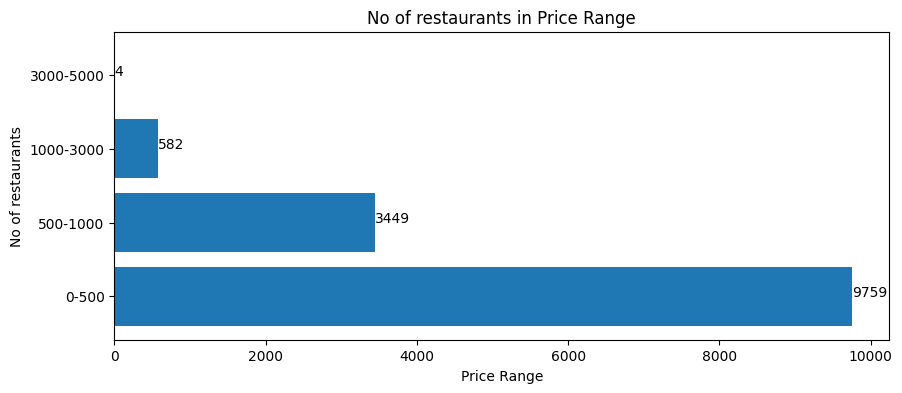

In [30]:
#Plotting Graph between no. of restaurant and price range
x = df['PRICE'].value_counts().index
y = df['PRICE'].value_counts().values
plt.figure(figsize=(10, 4))
plt.barh(x,y)
plt.title("No of restaurants in Price Range")
plt.xlabel("Price Range")
plt.ylabel("No of restaurants")
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

In [35]:
#Grouping Rating in three categories
df['RATING'] = pd.cut(df['RATING'], [2,3,4,5], labels=['Low','Medium','High'])
df['RATING'].value_counts()

Medium    8075
Low       1629
High       841
Name: RATING, dtype: int64

In [33]:
df.RATING.value_counts().head(30).iplot(kind="bar")

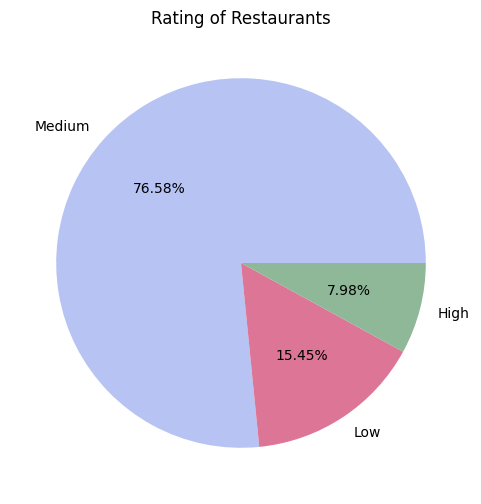

In [36]:
#Plotting Graph for percentage of restaurants as per ratings
x = df['RATING'].value_counts().index
y = df['RATING'].value_counts().values
plt.figure(figsize=(6, 6))
plt.pie(y,labels=x,colors=['#B7C3F3', '#DD7596', '#8EB897'],autopct='%1.2f%%')
plt.title("Rating of Restaurants")
plt.show()